<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-preprocessing-(try-except)-and-cuda-setting" data-toc-modified-id="Data-preprocessing-(try-except)-and-cuda-setting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing (try except) and cuda setting</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Display-the-shape-of-data-set" data-toc-modified-id="Display-the-shape-of-data-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Display the shape of data set</a></span></li><li><span><a href="#Visualize-the-dataset" data-toc-modified-id="Visualize-the-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualize the dataset</a></span></li></ul></li><li><span><a href="#Build-the-model" data-toc-modified-id="Build-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build the model</a></span></li><li><span><a href="#Build-the-cost-function" data-toc-modified-id="Build-the-cost-function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build the cost function</a></span><ul class="toc-item"><li><span><a href="#Setting-of-optimizer" data-toc-modified-id="Setting-of-optimizer-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Setting of optimizer</a></span></li><li><span><a href="#Test-network" data-toc-modified-id="Test-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test network</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Visualize-the-result" data-toc-modified-id="Visualize-the-result-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualize the result</a></span><ul class="toc-item"><li><span><a href="#Plot-of-ground-truth" data-toc-modified-id="Plot-of-ground-truth-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plot of ground truth</a></span></li><li><span><a href="#Plot-of-prediction" data-toc-modified-id="Plot-of-prediction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plot of prediction</a></span></li><li><span><a href="#Generate-a-movie" data-toc-modified-id="Generate-a-movie-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Generate a movie</a></span></li></ul></li></ul></div>

# Data Loading

# Data preprocessing (try except) and cuda setting

In [24]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize


import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from operator import itemgetter


#import sys
#sys.path.append(os.path.join('.', '..')) # Allow us to import shared custom 
                                        # libraries, like utils.py
    
from data_utils import * # The file contains the function used for data preprocessing
from visualization import * # The file contains the function used for visualization

# Data preprocessing

## Read in the data

In [25]:
HEIGHT = 128
WIDTH = 128
BATCH_SIZE = 30 
TRAINING_SIZE = 15 # The number of frames as the input

paths1, dirs1, filenames1 = next(os.walk('data/training/'))
filenames1 = sorted(filenames1, key=lambda x:x[:10])
print(filenames1)

data_train = train_generator(filenames1, batch_size = BATCH_SIZE,
                             training_size = TRAINING_SIZE, height = HEIGHT, width = WIDTH)

paths2, dirs2, filenames2 = next(os.walk('data/validation/'))
filenames2 = sorted(filenames2, key=lambda x:x[:10])
print(filenames2)

data_valid = valid_generator(filenames2, batch_size = 20, 
                             validation_size = TRAINING_SIZE, height = HEIGHT, width = WIDTH)

paths2, dirs2, filenames2 = next(os.walk('data/test/'))
filenames3 = sorted(filenames2, key=lambda x:x[:10])
print(filenames3)
data_test = test_generator(filenames3, 
                           height = HEIGHT, width = WIDTH)

['2019-01-01_berlin_9ch.h5', '2019-01-02_berlin_9ch.h5', '2019-01-03_berlin_9ch.h5', '2019-01-04_berlin_9ch.h5', '2019-01-05_berlin_9ch.h5', '2019-01-06_berlin_9ch.h5', '2019-01-07_berlin_9ch.h5', '2019-01-08_berlin_9ch.h5', '2019-01-09_berlin_9ch.h5', '2019-01-10_berlin_9ch.h5']
Now we are processing the 0th file
Now we are processing the 1th file
Now we are processing the 2th file
Now we are processing the 3th file
Now we are processing the 4th file
Now we are processing the 5th file
Now we are processing the 6th file
Now we are processing the 7th file
Now we are processing the 8th file
Now we are processing the 9th file
['2019-01-11_berlin_9ch.h5', '2019-01-12_berlin_9ch.h5']
Now we are processing the 0th file
Now we are processing the 1th file
['2019-01-13_berlin_9ch.h5']
Now we are processing the 0th file


## Display the shape of data set

In [26]:
data1 = data_train.get_data()
data2 = data_valid.get_data()
data3 = data_test.get_data()

In [27]:
print('The shape of training data',data1.shape)
print('The shape of validation data',data2.shape)
print('The shape of test data',data3.shape)

The shape of training data torch.Size([2880, 128, 128, 8])
The shape of validation data torch.Size([576, 128, 128, 8])
The shape of test data torch.Size([288, 128, 128, 8])


In [28]:
#training = data1[0:200,200:232,200:232,0:8]
training = data1[0:200,:,:,0:8]
test = data1[201:288,200:232,200:232,0:8]
print(training.shape)
print(test.shape)

torch.Size([200, 128, 128, 8])
torch.Size([87, 0, 0, 8])


## Visualize the dataset

Here We have a look at the traffic maps in each heading. Red for speed and green for volumn. 

(128, 128, 8)


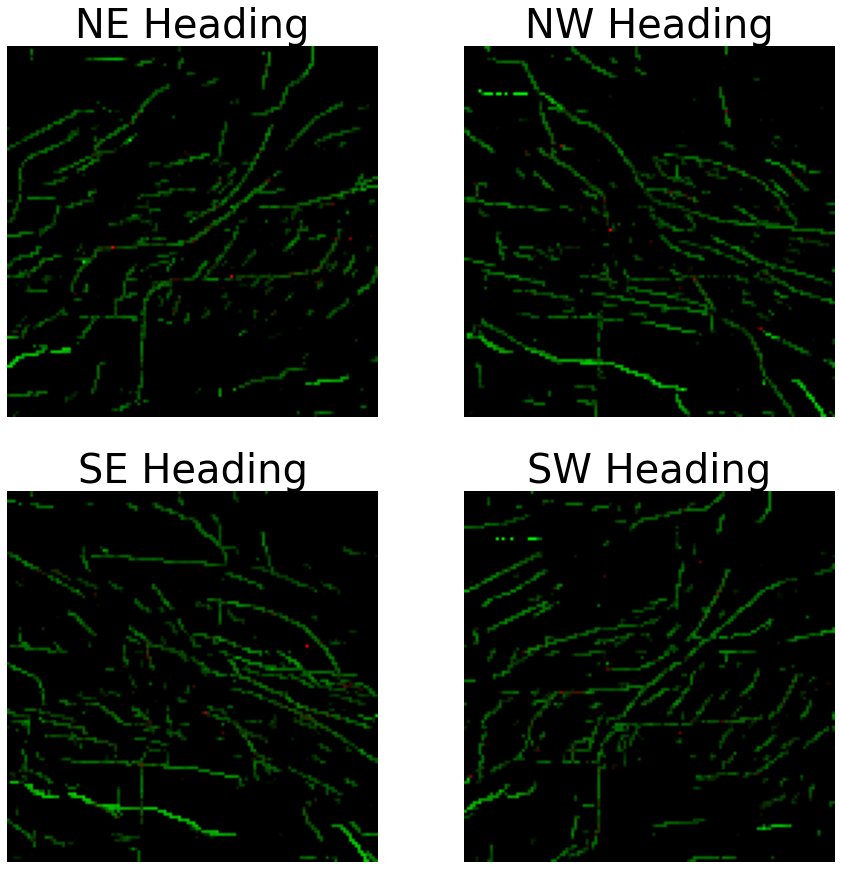

In [29]:
i=0
plotter = RGBMapPlotter(data1[13+3*i:16+3*i],1,i,"true")
plotter.plot_map()

# Build the model

In [10]:
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d, BatchNorm2d, ReLU, ConvTranspose2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

Decide if we deploy CUDA for the calculation 

In [11]:
use_cuda = False
print("Running GPU.") if use_cuda else print("No GPU available.")

if use_cuda: # The GPU memory is not enough on our laptop. cuda is disabled.
    data_train.get_cuda()
    data_valid.get_cuda()


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


In [12]:
INITIAL_CHANNEL = 8
height = 128
width = 128

features = INITIAL_CHANNEL*12

kernel_size_conv =  3      # Kernel size for convolution
conv_stride =  1      # Stride
conv_pad    =  1   # Padding

kernel_size_maxp = 2 
kernel_size_trans = 2
stride_maxp = 2 
stride_trans = 2
    
# A function define the double convolution sequanetial of the UNet    
def double_conv(in_channels, out_channels, kernel_size, stride, padding):
    return nn.Sequential(
        Conv2d(in_channels, out_channels, kernel_size, stride, padding),
        BatchNorm2d(out_channels),
        ReLU(),
        Conv2d(out_channels, out_channels, kernel_size, stride, padding),
        BatchNorm2d(out_channels),
        ReLU(),
    )  
    
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.encoder1 = double_conv(in_channels=features,
                             out_channels=features*2,
                             kernel_size=kernel_size_conv,
                             stride=conv_stride,
                             padding=conv_pad)
        
        
        self.encoder2 = double_conv(in_channels=features*2,
                             out_channels=features*4,
                             kernel_size=kernel_size_conv,
                             stride=conv_stride,
                             padding=conv_pad)
        
        self.maxpool = nn.MaxPool2d(kernel_size= kernel_size_maxp, stride= stride_maxp)       
        
        self.bottleneck = double_conv(in_channels=features*4,
                             out_channels=features*8,
                             kernel_size=kernel_size_conv,
                             stride=conv_stride,
                             padding=conv_pad)
        
        
        self.upconv2 = nn.ConvTranspose2d(
            features * 8, features * 4, kernel_size=kernel_size_trans, stride=stride_trans, padding=0
        )
        self.upconv1 = nn.ConvTranspose2d(
            features * 4, features * 2, kernel_size=kernel_size_trans, stride=stride_trans, padding=0,
        )
        
        
        self.decoder2 = ConvTranspose2d(in_channels=features*8,
                             out_channels=features*4,
                             kernel_size=kernel_size_conv,
                             stride=conv_stride,
                             padding=conv_pad)
        
        self.decoder1 = ConvTranspose2d(in_channels=features*4,
                             out_channels=features*2,
                             kernel_size=kernel_size_conv,
                             stride=conv_stride,
                             padding=conv_pad)
        
        self.decoder0 = Conv2d(in_channels=features*2,
                             out_channels=int(features/4),
                             kernel_size=1,
                             stride=1,
                             padding=0)
        
    def forward(self, x):
        out = {}
        
        # Downsampling
        c1 = self.encoder1(x)
        p1 = self.maxpool(c1)     
        c2 = self.encoder2(p1)
        p2 = self.maxpool(c2)
        bottleneck = self.bottleneck(p2)
        
        # Upsampling 
        d2 = self.upconv2(bottleneck)
        d2 = torch.cat((d2, c2), dim=1)
        d2 = self.decoder2(d2)
        d1 = self.upconv1(d2)
#        d1 = self.upconv1(bottleneck)
        d1 = torch.cat((d1, c1), dim=1)
        d1 = self.decoder1(d1)
    
        # Output layer
        out['out'] = relu(self.decoder0(d1))
        return out

net = Net()
if use_cuda:
    net.cuda()
print(net)

Net(
  (encoder1): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bottleneck): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Ba

# Build the cost function

## Setting of optimizer

In [13]:
LEARNING_RATE = 0.001
#criterion = nn.CrossEntropyLoss()    
criterion = torch.nn.MSELoss()
# weight_decay is equal to L2 regularization
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE, weight_decay=0.0)

# def accuracy(ys, ts):
#     predictions = torch.max(ys, 1)[1]
#     correct_prediction = torch.eq(predictions, ts)
#     return torch.mean(correct_prediction.float())

## Test network




In [14]:
training = training.reshape(1,128,128,1600)
training_slice = training[:,:,:,:96]
training_slice = training_slice.reshape(1,96,128,128)
training_slice = torch.FloatTensor(training_slice.float())

In [15]:

# test the forward pass
print(training_slice.shape)
output = net(training_slice)
output['out'].shape


torch.Size([1, 96, 128, 128])


torch.Size([1, 24, 128, 128])

# Train

<Figure size 864x288 with 0 Axes>

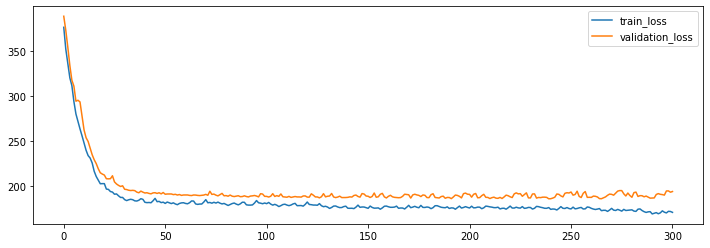

This is the 602th batch in training
training loss tensor(172.3686, grad_fn=<MseLossBackward>)


<Figure size 864x288 with 0 Axes>

In [16]:
# Setup settings for training 
max_iter = 600
log_every = 2
eval_every = 2

# Initialize lists for training and validation
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# Train network
net.train()
for i, batch_train in enumerate(data_train.get_train_new()):
    
    # Do the validaiton
    if i % eval_every == 0:
        net.eval()
        val_losses, val_accs, val_lengths = 0, 0, 0
        for j,batch_valid in enumerate(data_valid.gen_valid()):
            output = net(batch_valid[0])
            val_losses += criterion(output['out'], batch_valid[1])# * num
            break

        print("validation loss", val_losses)
        valid_loss.append(get_numpy(val_losses))
        valid_iter.append(i)
#         print("Valid, it: {} loss: {:.2f} accs: {:.2f}\n".format(i, valid_loss[-1], valid_accs[-1]))
        net.train()
    
#    Train network
#    print(batch_train[0].shape,batch_train[1].shape)
    optimizer.zero_grad()
    output = net(batch_train[0])
    batch_loss = criterion(output['out'], batch_train[1])
    print("training loss",batch_loss)
    train_iter.append(i)
    train_loss.append(float(get_numpy(batch_loss)))  
    
    batch_loss.backward()
    optimizer.step()
    
    fig = plt.figure(figsize=(12,4))
    #plt.subplot(1, 2, 1)
    if i % log_every == 0:
        clear_output(wait=True)
        plt.plot(train_loss[::2], label='train_loss')
        plt.plot(valid_loss, label='validation_loss')
        plt.legend()
        plt.show() 
        
    if max_iter < i:
        break
        


# Visualize the result

We make the RGB plot to make a comparison between the ground truth and prediction. In our plot, volume(green) and speed(red) are presented in each heading separately.

## Plot of ground truth

(128, 128, 8)


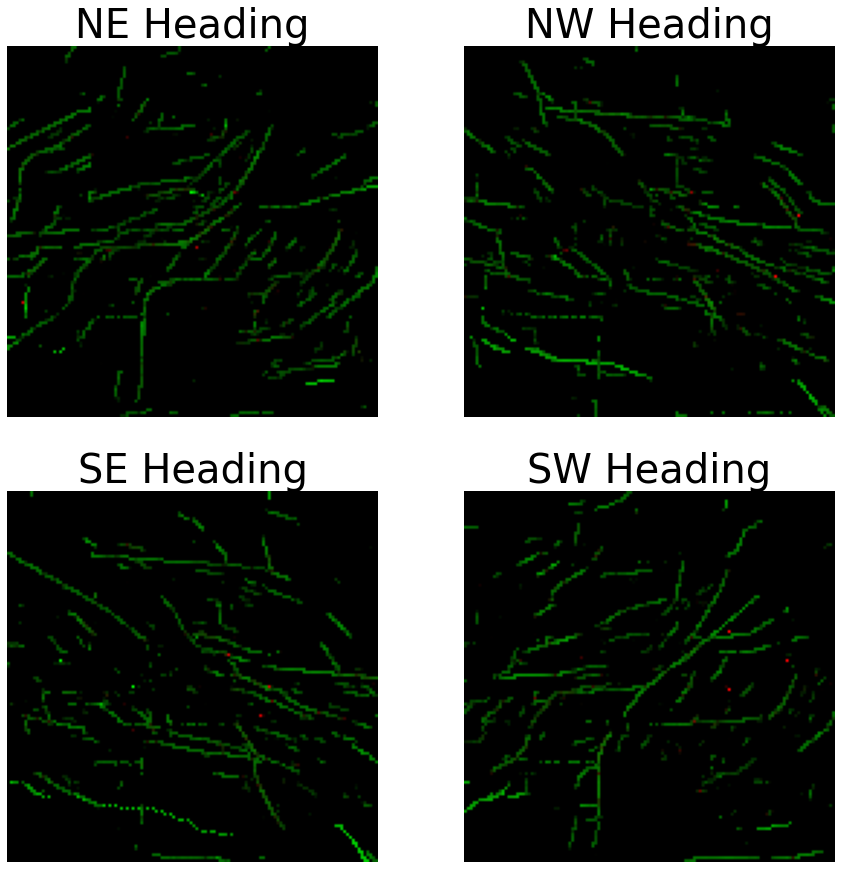

In [30]:
i=0
plotter = RGBMapPlotter(data3[13+3*i:16+3*i],1,i,"true")
plotter.plot_map()

## Plot of prediction

(128, 128, 8)


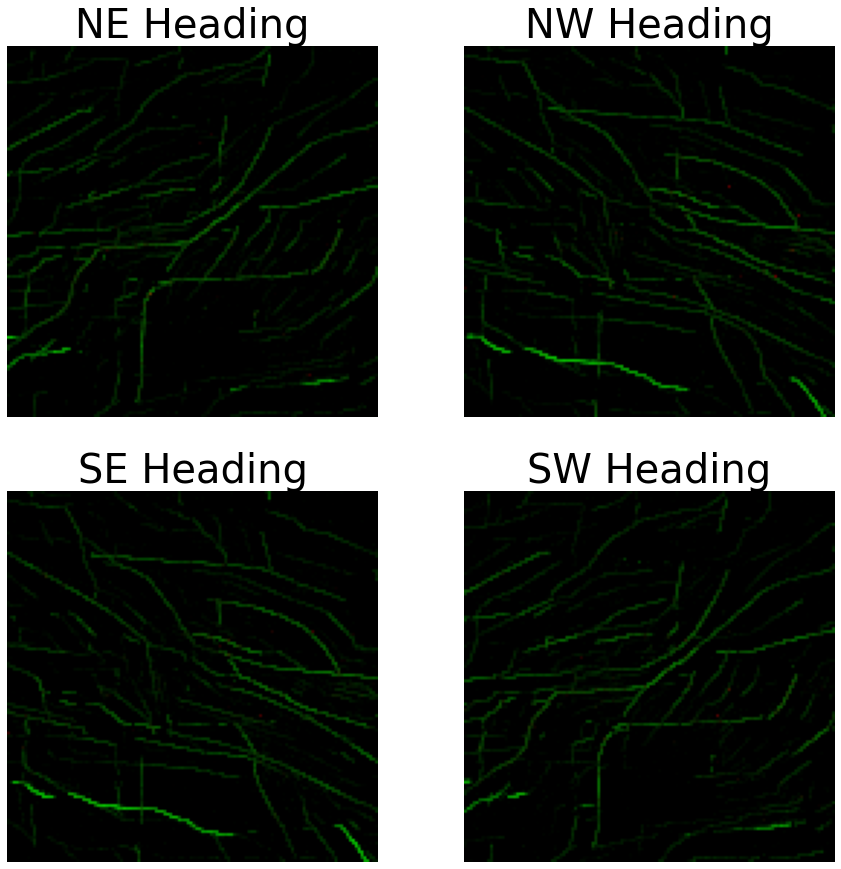

In [31]:
output = net(data3[0+3*i:12+3*i,:,:,:].reshape(1,96,HEIGHT, WIDTH))
plotter2= RGBMapPlotter(output['out'].reshape(3, HEIGHT, WIDTH, 8),1,i,"prediction")#torch.round(output['out'].reshape(3, 128, 128, 8)
plotter2.plot_map()